In [79]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pdf2image import convert_from_path
import pytesseract

Height: 2778, Width: 1956, Area: 5433768


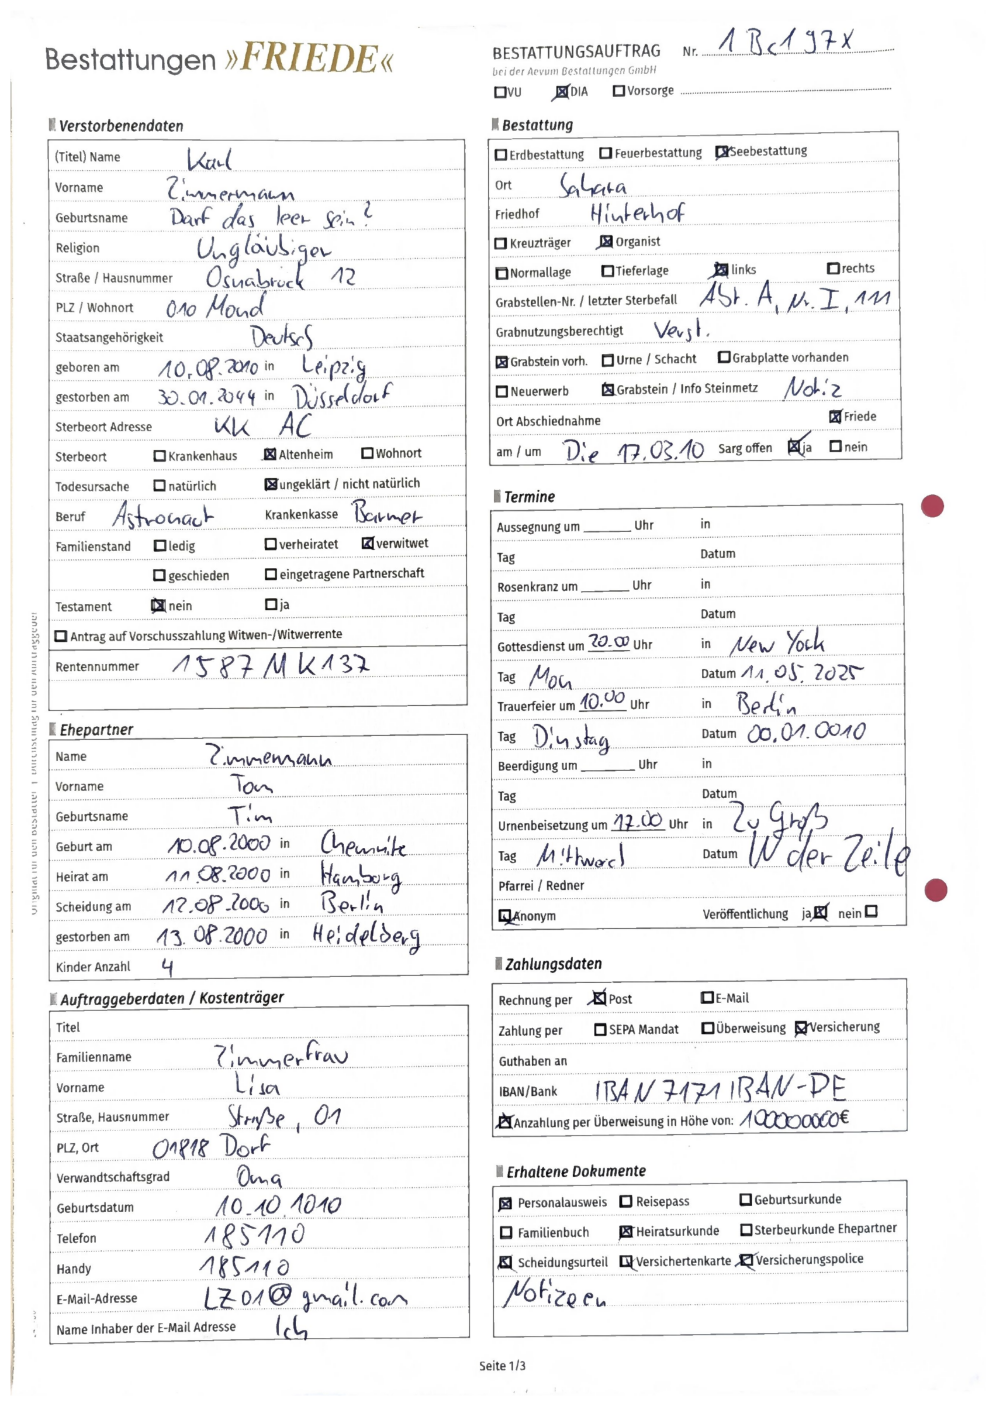

In [88]:
# Load the image
pages = convert_from_path("./testdaten/003.pdf")
page = pages[0]

image = cv2.cvtColor(np.array(pages[0]), cv2.COLOR_RGB2BGR)

image_height = image.shape[0]
image_width = image.shape[1]
image_area = image_height * image_width

print(f"Height: {image_height}, Width: {image_width}, Area: {image_area}")

plt.figure(figsize=(32, 18))
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

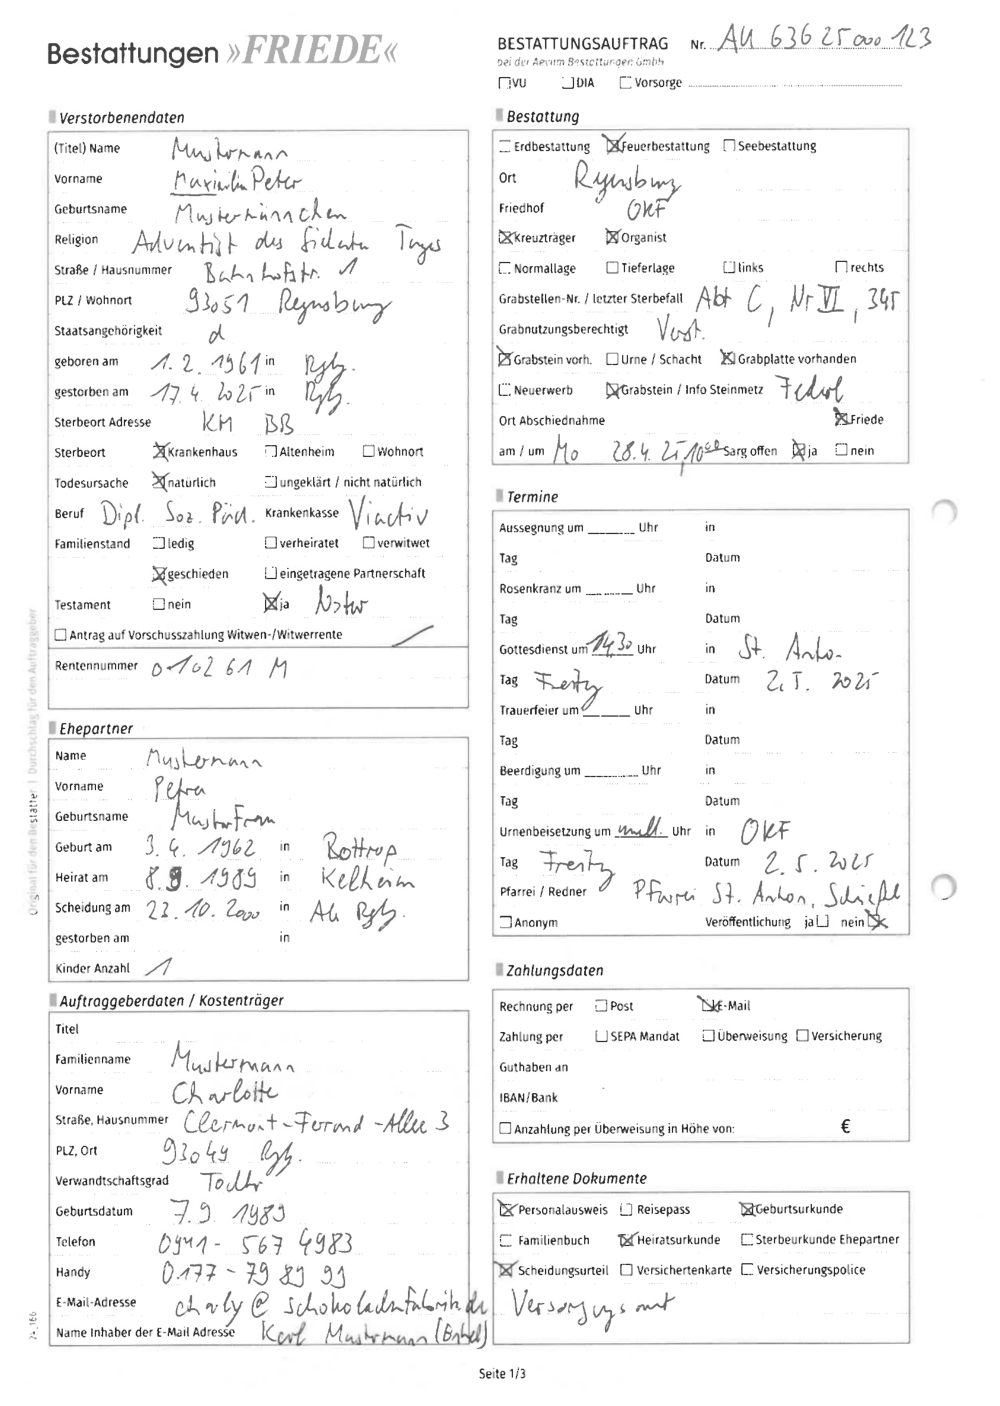

In [81]:
gray = cv2.medianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 3)

plt.figure(figsize=(32, 18))
plt.axis("off")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

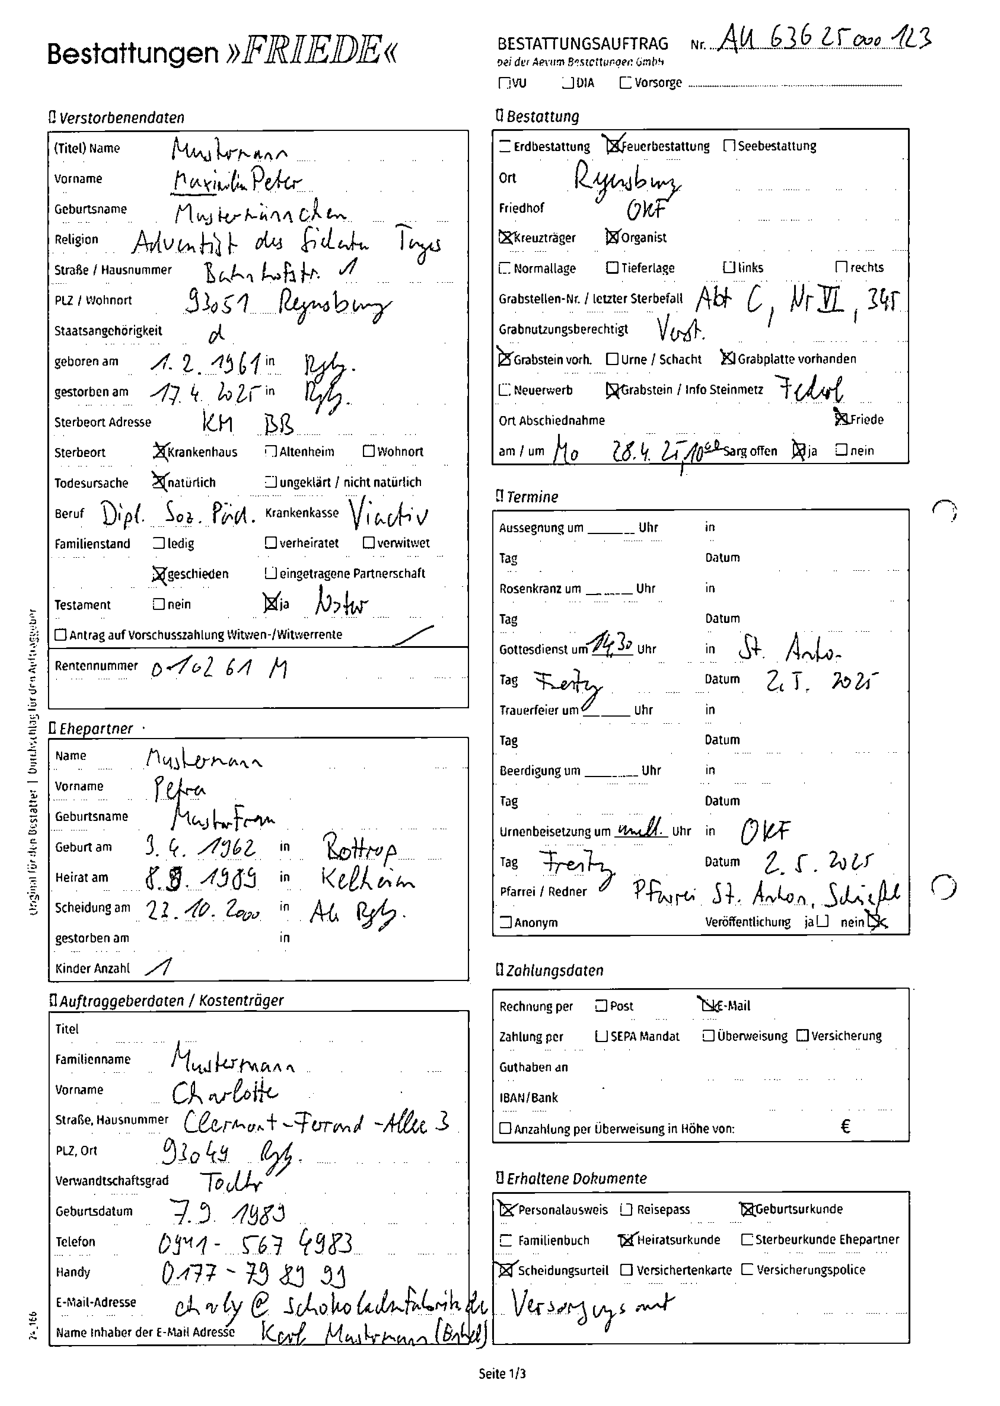

In [82]:
# Thresholding the image
img_bin = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)

plt.figure(figsize=(32, 18))
plt.axis("off")
plt.imshow(cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB))
plt.show()

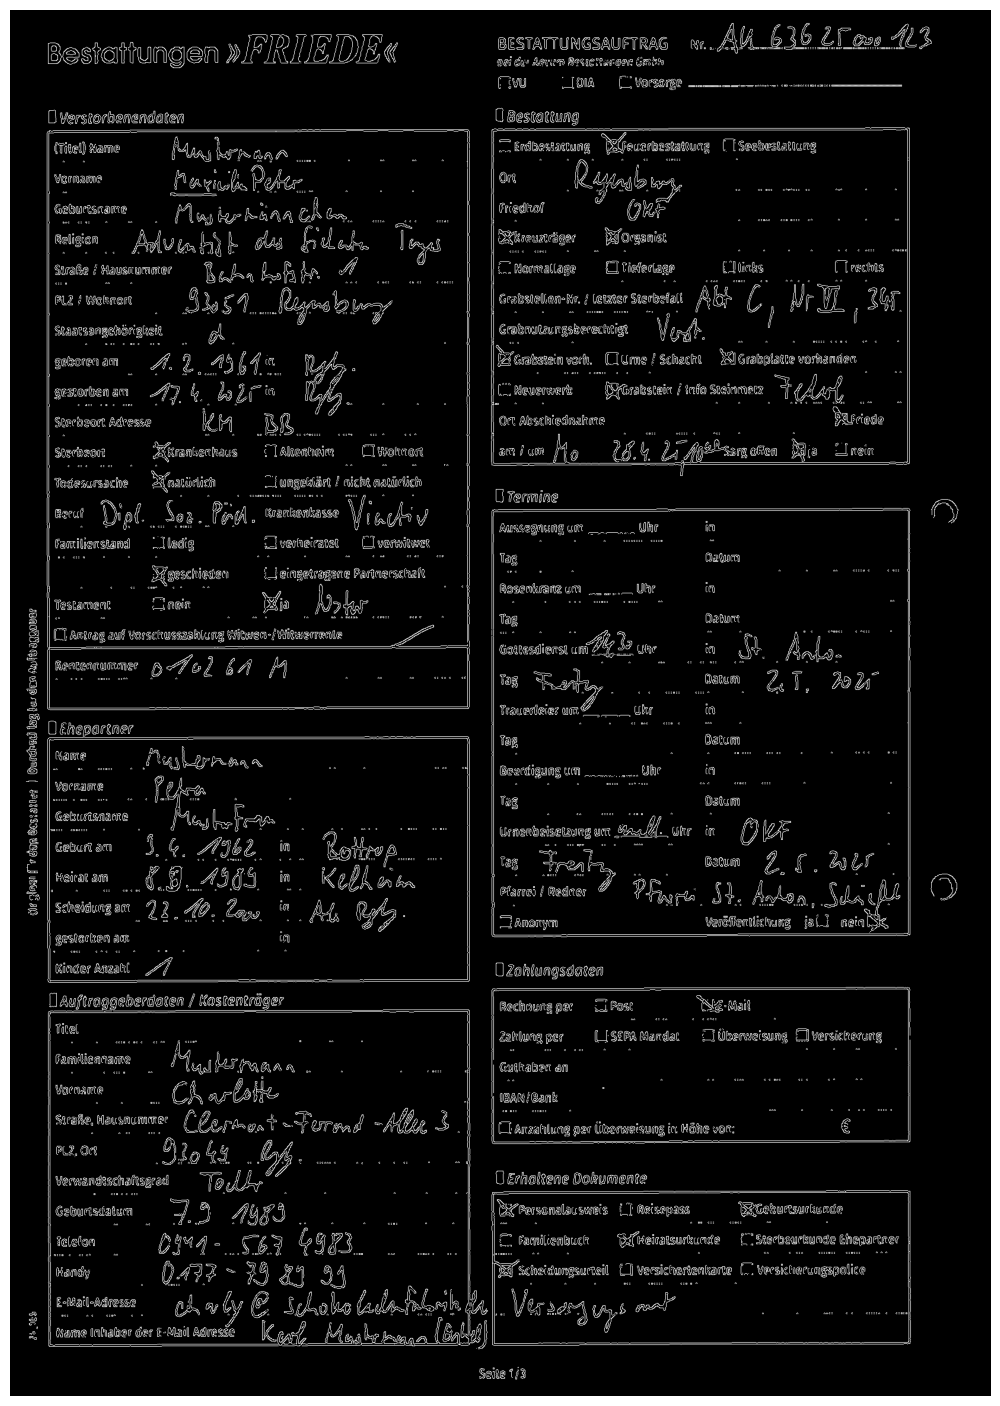

In [83]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

plt.figure(figsize=(32, 18))
plt.axis("off")
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()

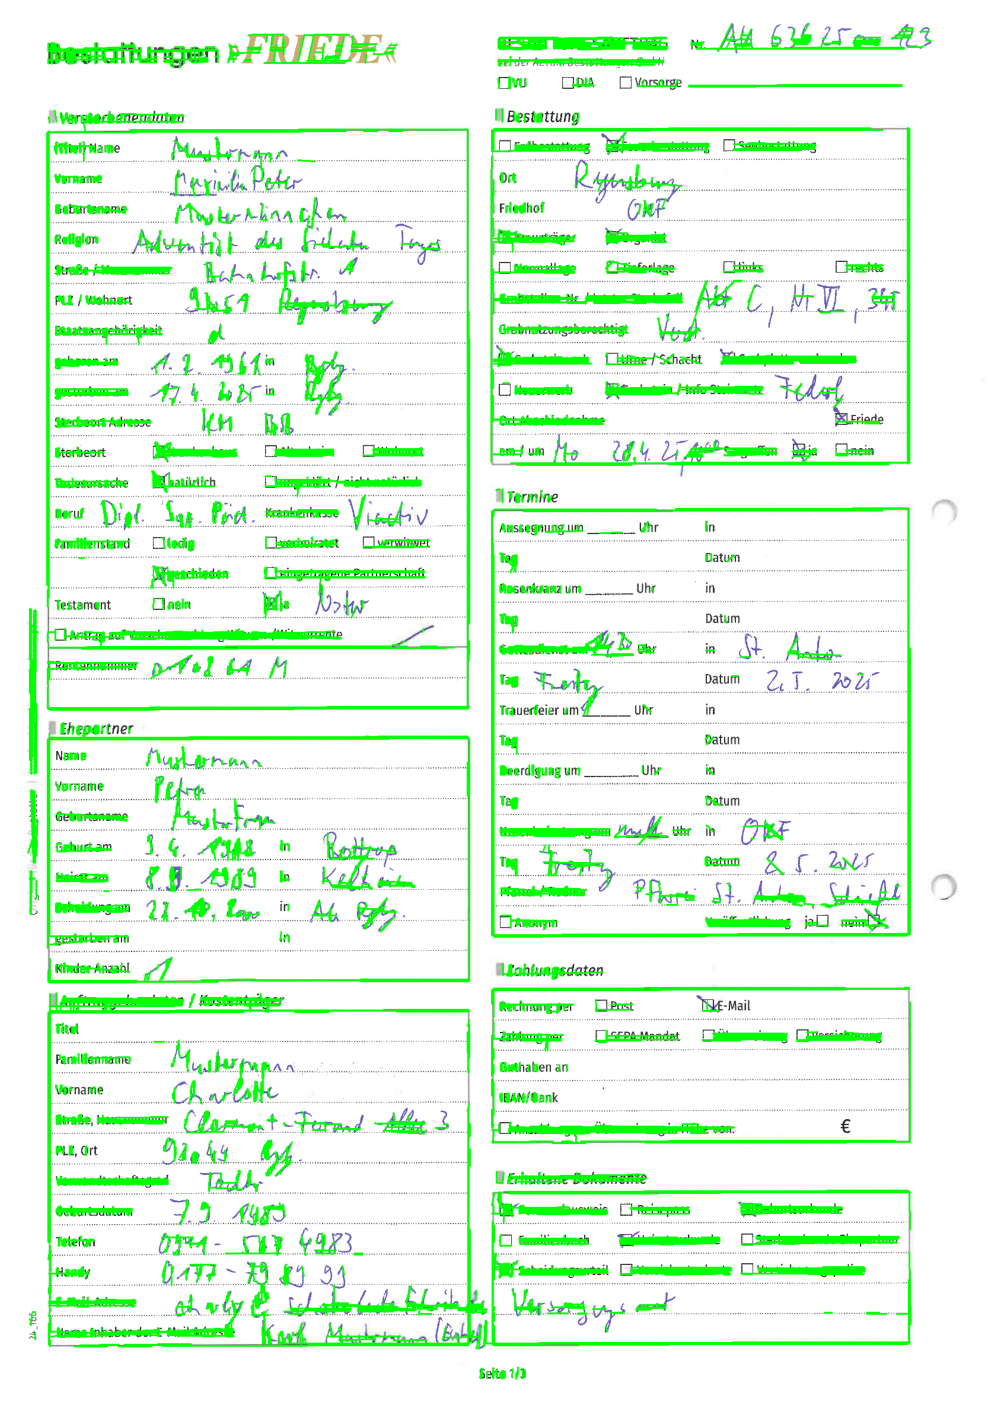

In [84]:
# Use canny edge detection
lines = cv2.HoughLinesP(
    edges, # Input edge image
    1, # Distance resolution in pixels
    np.pi/180, # Angle resolution in radians
    threshold=100, # Min number of votes for valid line
    minLineLength=5, # Min allowed length of line
    maxLineGap=10 # Max allowed gap between line for joining them
)

line_img = image.copy()
horiz_lines = []

# Iterate over points
for points in lines:
    # Extracted points nested in the list
    x1,y1,x2,y2=points[0]

    x = np.array([x1, x2])
    y = np.array([y1, y2])

    length = np.linalg.norm(x-y)

    #if not 0.3 < (length / width) < 0.5:
    #    continue

    # Draw the lines joing the points
    # On the original image
    horiz_lines.append((x1, y1, x2, y2))
    cv2.line(line_img,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=(32, 18))
plt.axis("off")
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.show()

705
728
705
711
705
711
705


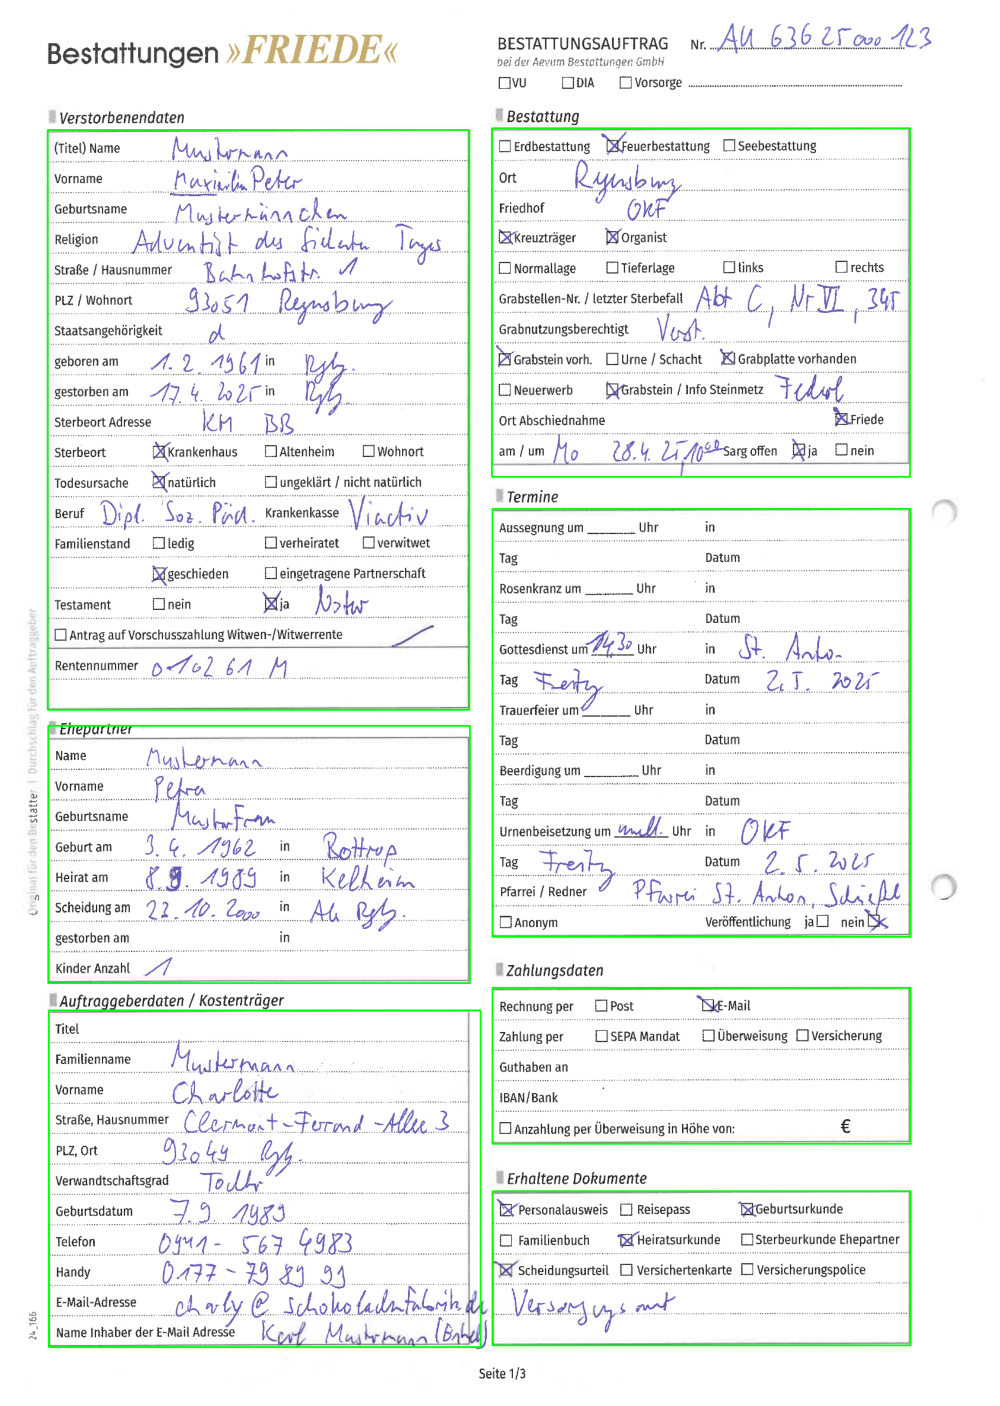

In [85]:
# Find contours in the binary image
contours, hierarchy = cv2.findContours(~img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles around each contour
img_boxes = image.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    if w / image_width < 0.3 or w / image_width > 0.5:
        continue

    print(w)

    cv2.rectangle(img_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(32, 18))
plt.axis("off")
plt.imshow(cv2.cvtColor(img_boxes, cv2.COLOR_BGR2RGB))
plt.show()


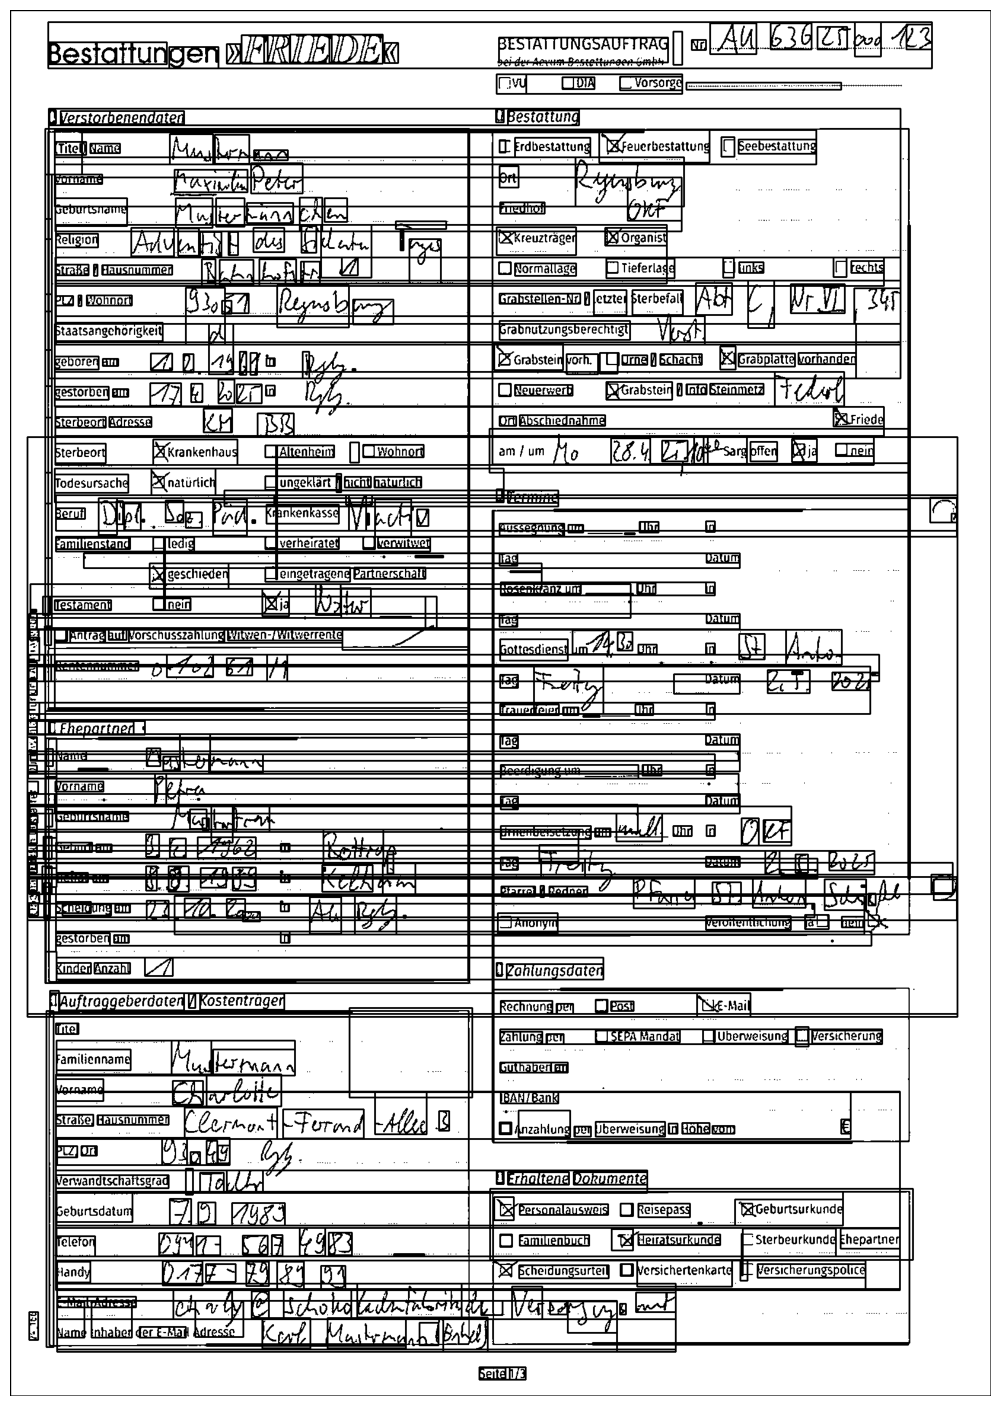

In [86]:
img_text_boxes = img_bin.copy()
data = pytesseract.image_to_data(img_text_boxes, output_type=pytesseract.Output.DICT)

rois = []

n_boxes = len(data['level'])
for i in range(n_boxes):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    cv2.rectangle(img_text_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    rois.append(image[y:y+h, x:x+w])

plt.figure(figsize=(32, 18))
plt.imshow(cv2.cvtColor(img_text_boxes, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

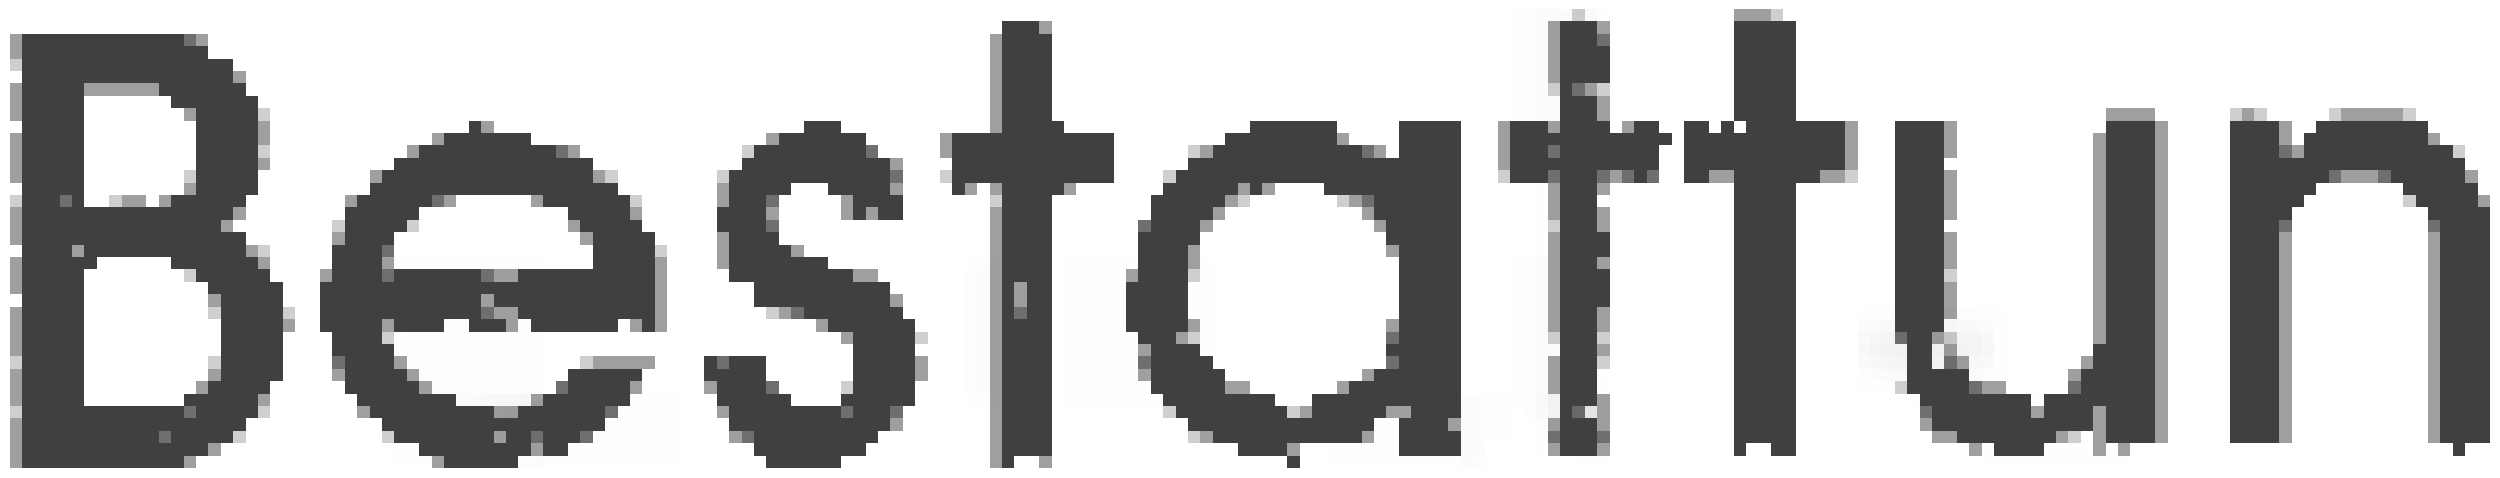

{'text': ''}

In [87]:
test_text = rois[4]
data = pytesseract.image_to_string(test_text, output_type=pytesseract.Output.DICT)

plt.figure(figsize=(32, 18))
plt.imshow(cv2.cvtColor(test_text, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
data